In [1]:

from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense

In [2]:
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

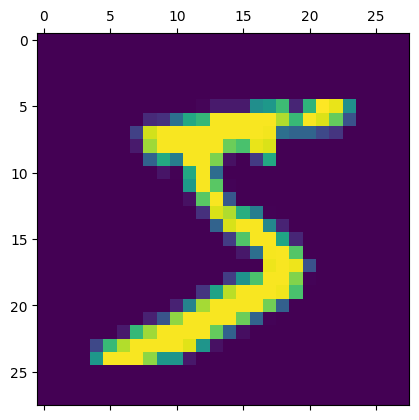

In [9]:
plt.matshow(X_train[0])

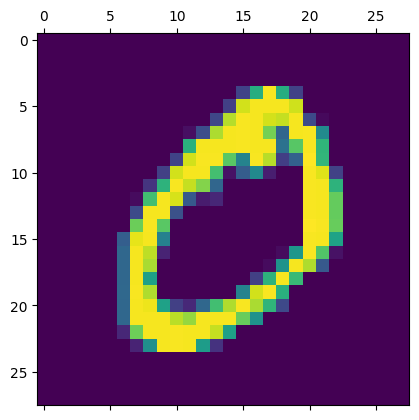

In [10]:
plt.matshow(X_train[1])

In [11]:
y_train[1]

0

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [14]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 243us/step - accuracy: 0.8130 - loss: 0.7198
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.9151 - loss: 0.3045
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 237us/step - accuracy: 0.9222 - loss: 0.2804
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.9256 - loss: 0.2732
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 236us/step - accuracy: 0.9262 - loss: 0.2654


In [16]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 213us/step - accuracy: 0.9143 - loss: 0.3041


[0.2667774558067322, 0.9251999855041504]

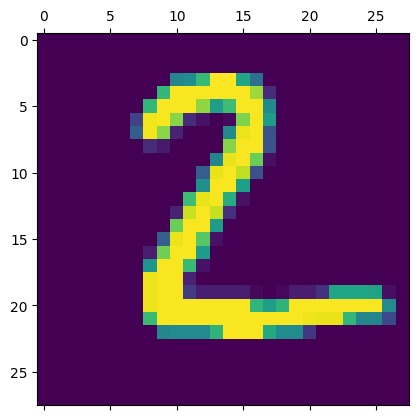

In [17]:
plt.matshow(X_test[1])

In [18]:
y_predicted=model.predict(X_test_flattened)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 210us/step


array([3.4632757e-01, 3.4171527e-03, 9.9891973e-01, 3.4175116e-01,
       5.9147959e-10, 8.3839250e-01, 8.5108191e-01, 1.1504328e-12,
       2.1688828e-01, 2.6864879e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    1,    0,    4,    7,    4,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    9,  918,   20,    7,    4,   12,   10,   41,    5],
       [   2,    0,   15,  918,    0,   27,    3,   11,   26,    8],
       [   1,    1,    4,    1,  918,    0,   10,    4,   10,   33],
       [  10,    3,    1,   35,   11,  766,   15,    7,   36,    8],
       [   9,    3,    7,    1,    8,   11,  914,    2,    3,    0],
       [   1,    6,   23,    7,    6,    0,    0,  954,    2,   29],
       [   6,    9,    5,   21,    9,   19,    8,   11,  875,   11],
       [  10,    7,    1,    9,   29,    4,    0,   28,    8,  913]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

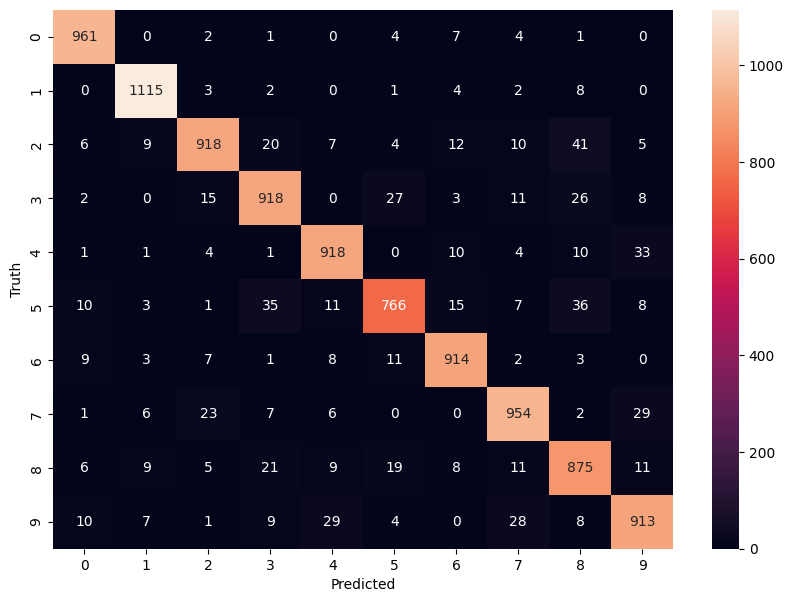

In [23]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [24]:
model=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - accuracy: 0.8760 - loss: 0.4431
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9613 - loss: 0.1300
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.9734 - loss: 0.0887
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.9798 - loss: 0.0680
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 571us/step - accuracy: 0.9863 - loss: 0.0479


In [25]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    2,    1,    0,    4,    7,    4,    1,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   6,    9,  918,   20,    7,    4,   12,   10,   41,    5],
       [   2,    0,   15,  918,    0,   27,    3,   11,   26,    8],
       [   1,    1,    4,    1,  918,    0,   10,    4,   10,   33],
       [  10,    3,    1,   35,   11,  766,   15,    7,   36,    8],
       [   9,    3,    7,    1,    8,   11,  914,    2,    3,    0],
       [   1,    6,   23,    7,    6,    0,    0,  954,    2,   29],
       [   6,    9,    5,   21,    9,   19,    8,   11,  875,   11],
       [  10,    7,    1,    9,   29,    4,    0,   28,    8,  913]],
      dtype=int32)>

In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 256us/step - accuracy: 0.9733 - loss: 0.0887


[0.07652529329061508, 0.9768999814987183]

Text(95.72222222222221, 0.5, 'Truth')

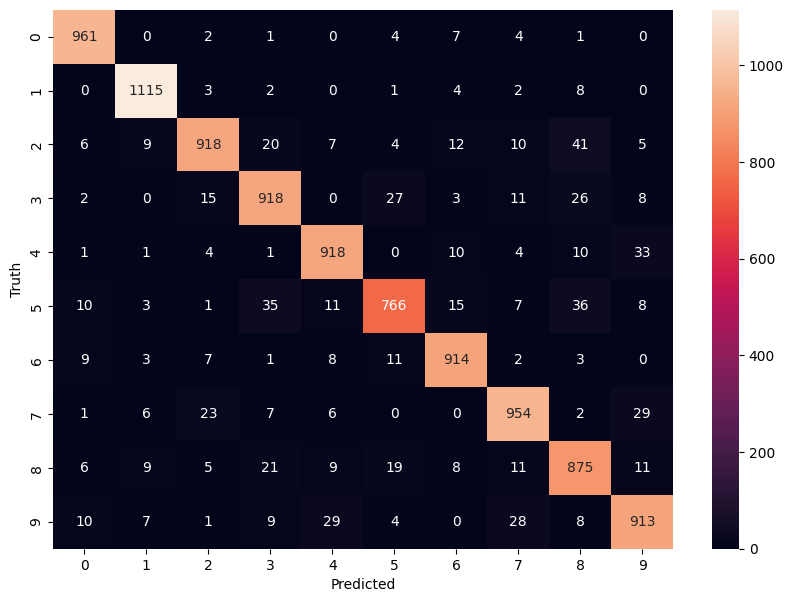

In [27]:
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


keras already has an attribute for flattening the dataset

In [132]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train,y_train,epochs=5)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 776us/step - accuracy: 0.8714 - loss: 0.4553
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.9613 - loss: 0.1333
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 728us/step - accuracy: 0.9734 - loss: 0.0868
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.9810 - loss: 0.0621
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 671us/step - accuracy: 0.9841 - loss: 0.0526
